# Julia's JIT Compiler

#### An exploration of just in time compilation in Julia

## What's Julia?  A Quadratic Map Example

In [56]:
using PyPlot

Plot the time series

$$ x_t = 4 x_{t-1} (1-x_{t-1}) \quad \text{given} \quad x_0 = 0.1 $$



First we write a function that generates the time series.

In [57]:
function quad_series(x0, n)
    x = Array{Float64}(undef, n)
    x[1] = x0
    for t in 2:n
        x[t] = 4*x[t-1] * (1-x[t-1])
    end
    return x
end

quad_series (generic function with 1 method)

Now let's generate and plot it.

In [58]:
x = quad_series(0.1, 100);

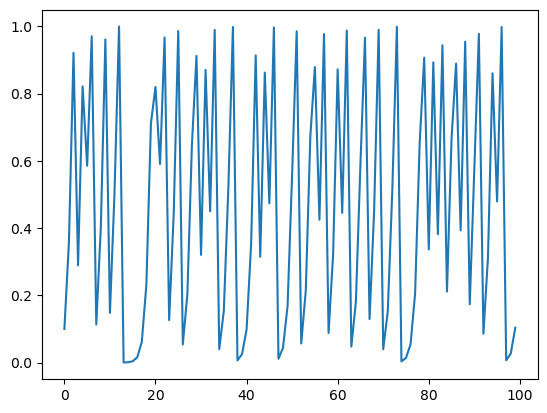

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [59]:
fig, ax = plt.subplots()
ax.plot(x)
plt.show()

## Why JIT Compilers?

See the notebook `python_jit.ipynb`.

## Testing the JIT Compiler

Here's a map that returns $x_n$ given $x_0$ and $n$.

In [60]:
function quad_map(x0, n)
    x = x0
    for i in 1:n
        x = 4x * (1-x)
    end
    return x
end

quad_map (generic function with 1 method)

Let's test it with a large value of $n$.

In [61]:
n = 10_000_000

@time quad_map(0.1, n)

  0.056290 seconds (28.36 k allocations: 1.631 MiB, 33.64% compilation time)


0.7861771553524716

In [62]:
@time quad_map(0.1, n)

  0.043466 seconds (1 allocation: 16 bytes)


0.7861771553524716

Let's compare this to Fortran.

In [63]:
;gfortran -O3 fastquad.f90

In [64]:
;./a.out

 last val =   0.46200166384322749     
 elapsed time =    6.6042999999999991E-002
